**Manually Data Cleaning**

Firstly I did some cleaning manually for the data received:
* convert the spreadsheet to comma seperated files(.csv ) for easy handling with Python(Note that i just reserved the sheet 1 of each spreadsheet)
* rearrange the first column of the .csv files 
* delete the cells which say "无数据"
* delete the preceding white spaces in each cell


I put the raw data in: ./data/raw  and  the  manually cleaned data in:  ./data


**Preamble:** overview of the datasheet

I load all the packages needed for this demo

* **visualization:** matplolib, seaborn, basemap
* **data manipulation:** pandas, numpy
* **modeling:** sklearn, scipy
* **class definition:** regression, figures

In [1]:
import datetime, warnings, scipy 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import ConnectionPatch
from collections import OrderedDict
from matplotlib.gridspec import GridSpec
#from mpl_toolkits.basemap import Basemap
from sklearn import metrics, linear_model
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from scipy.optimize import curve_fit
plt.rcParams["patch.force_edgecolor"] = True
plt.style.use('fivethirtyeight')
mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr"
pd.options.display.max_columns = 50
%matplotlib inline
warnings.filterwarnings("ignore")

load all the data into pandas dataframe

In [2]:
_737_airCondition_data=pd.read_csv("./data/737机队空调数据（4月8日-5月8日）.csv")
report_1=pd.read_csv("./data/398908-3.csv")
report_2=pd.read_csv("./data/398908-5.csv")
report_3=pd.read_csv("./data/541674-4.csv")
report_4=pd.read_csv("./data/2206400-2.csv")
report_5=pd.read_csv("./data/67600014-1.csv")

define a function to calculate the shapes of all the data frames: 

In [3]:
def rows_columns_count(dfs):
    rows_count= [df.shape[0] for df in dfs]
    columns_count=[df.shape[1] for df in dfs]
    return [rows_count, columns_count]


call **rows_columns_count** and get the dataframes shapes

In [4]:
dfs=[_737_airCondition_data,report_1,report_2,report_3,report_4,report_5]
dataFrame_dimensions=pd.DataFrame(rows_columns_count(dfs),\
                                  index=['rowscount', 'columnscount'],\
                                  columns=['_737_airCondition_data','report_1','report_2','report_3','report_4','report_5'])
dataFrame_dimensions

,_737_airCondition_data,report_1,report_2,report_3,report_4,report_5
rowscount,398,1125,309,896,419,136
columnscount,16,35,35,35,35,35


get some infos on column types and number of null values of **737机队空调数据**

In [5]:
_737_airCondition_data_Tab_Info=pd.DataFrame(_737_airCondition_data.dtypes).T.rename(index={ 0:'Column Type'})
_737_airCondition_data_Tab_Info=_737_airCondition_data_Tab_Info.append(pd.DataFrame(_737_airCondition_data.isnull().sum()).T.rename(index={ 0: 'nullvalues(nb)' }))
_737_airCondition_data_Tab_Info=_737_airCondition_data_Tab_Info.append(pd.DataFrame(_737_airCondition_data.isnull().sum()).T.rename(index={ 0: 'null values (%)' })/_737_airCondition_data.shape[0]*100)
_737_airCondition_data_Tab_Info

,飞机号,时间,环境温度(℃),左温差,右温差,左边CONTCABINDUCT,左边FWDDUCT,左边AFTDUCT,左边LPACK,左边SUPPLYDUCT,右边CONTCABINDUCT,右边FWDDUCT,右边AFTDUCT,右边LPACK,右边SUPPLYDUCT,排故措施
Column Type,object,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object
nullvalues(nb),209,209,6,7,6,6,6,6,6,6,6,6,6,6,6,0
null values (%),52.5126,52.5126,1.50754,1.75879,1.50754,1.50754,1.50754,1.50754,1.50754,1.50754,1.50754,1.50754,1.50754,1.50754,1.50754,0


get some infos on column types and number of null values of **report_1**

In [6]:
report_1_Tab_Info=pd.DataFrame(report_1.dtypes).T.rename(index={ 0:'Column Type'})
report_1_Tab_Info=report_1_Tab_Info.append(pd.DataFrame(report_1.isnull().sum()).T.rename(index={ 0: 'nullvalues(nb)' }))
report_1_Tab_Info=report_1_Tab_Info.append(pd.DataFrame(report_1.isnull().sum()).T.rename(index={ 0: 'null values (%)' })/report_1.shape[0]*100)
report_1_Tab_Info

,机型,制造序列号,机号,参考类型,指令类型,件号,序号,章节号,非计划,故障确认,拆换原因,安装日期,部件装上飞行小时数,部件装上飞行循环数,部件装上使用小时数,部件装上使用循环数,拆换日期,部件拆下飞行小时数,部件拆下飞行循环数,部件拆下使用小时数,部件拆下使用循环数,故障描述,部件本次装机使用小时,故障处理,部件本次装机使用循环,装上件号,装上序号,最近送修公司,CYTSN,FHTSN,送修至拆下时间/FH,送修至拆下时间/CY,件号描述,DEF#,TLB号
Column Type,object,object,int64,object,object,object,object,int64,object,object,object,object,object,int64,object,int64,object,object,int64,object,int64,object,object,object,int64,object,object,object,int64,float64,object,float64,object,int64,object
nullvalues(nb),0,0,0,0,0,0,0,0,148,196,0,0,0,0,0,0,0,0,0,0,0,290,0,3,0,0,0,437,0,0,453,453,0,0,11
null values (%),0,0,0,0,0,0,0,0,13.1556,17.4222,0,0,0,0,0,0,0,0,0,0,0,25.7778,0,0.266667,0,0,0,38.8444,0,0,40.2667,40.2667,0,0,0.977778


get some infos on column types and number of null values of **report_2**

In [7]:
report_2_Tab_Info=pd.DataFrame(report_2.dtypes).T.rename(index={ 0:'Column Type'})
report_2_Tab_Info=report_2_Tab_Info.append(pd.DataFrame(report_2.isnull().sum()).T.rename(index={ 0: 'nullvalues(nb)' }))
report_2_Tab_Info=report_2_Tab_Info.append(pd.DataFrame(report_2.isnull().sum()).T.rename(index={ 0: 'null values (%)' })/report_2.shape[0]*100)
report_2_Tab_Info

,机型,制造序列号,机号,参考类型,指令类型,件号,序号,章节号,非计划,故障确认,拆换原因,安装日期,部件装上飞行小时数,部件装上飞行循环数,部件装上使用小时数,部件装上使用循环数,拆换日期,部件拆下飞行小时数,部件拆下飞行循环数,部件拆下使用小时数,部件拆下使用循环数,故障描述,部件本次装机使用小时,故障处理,部件本次装机使用循环,装上件号,装上序号,最近送修公司,CYTSN,FHTSN,送修至拆下时间/FH,送修至拆下时间/CY,件号描述,DEF#,TLB号
Column Type,object,object,int64,object,object,object,int64,int64,object,object,object,object,object,int64,object,int64,object,object,int64,object,int64,object,object,object,int64,object,int64,object,int64,float64,object,float64,object,int64,object
nullvalues(nb),0,0,0,0,0,0,0,0,24,27,0,0,0,0,0,0,0,0,0,0,0,80,0,0,0,0,0,95,0,0,179,179,0,0,3
null values (%),0,0,0,0,0,0,0,0,7.76699,8.73786,0,0,0,0,0,0,0,0,0,0,0,25.89,0,0,0,0,0,30.7443,0,0,57.9288,57.9288,0,0,0.970874


get some infos on column types and number of null values of **report_3**

In [8]:
report_3_Tab_Info=pd.DataFrame(report_3.dtypes).T.rename(index={ 0:'Column Type'})
report_3_Tab_Info=report_3_Tab_Info.append(pd.DataFrame(report_3.isnull().sum()).T.rename(index={ 0: 'nullvalues(nb)' }))
report_3_Tab_Info=report_3_Tab_Info.append(pd.DataFrame(report_3.isnull().sum()).T.rename(index={ 0: 'null values (%)' })/report_3.shape[0]*100)
report_3_Tab_Info

,机型,制造序列号,机号,参考类型,指令类型,件号,序号,章节号,非计划,故障确认,拆换原因,安装日期,部件装上飞行小时数,部件装上飞行循环数,部件装上使用小时数,部件装上使用循环数,拆换日期,部件拆下飞行小时数,部件拆下飞行循环数,部件拆下使用小时数,部件拆下使用循环数,故障描述,部件本次装机使用小时,故障处理,部件本次装机使用循环,装上件号,装上序号,最近送修公司,CYTSN,FHTSN,送修至拆下时间/FH,送修至拆下时间/CY,件号描述,DEF#,TLB号
Column Type,object,object,int64,object,object,object,object,int64,object,object,object,object,object,int64,object,int64,object,object,int64,object,int64,object,object,object,int64,object,object,object,int64,float64,object,float64,object,int64,object
nullvalues(nb),0,0,0,0,0,0,0,0,85,109,0,0,0,0,0,0,0,0,0,0,0,198,0,1,0,0,0,339,0,0,347,347,0,0,28
null values (%),0,0,0,0,0,0,0,0,9.48661,12.1652,0,0,0,0,0,0,0,0,0,0,0,22.0982,0,0.111607,0,0,0,37.8348,0,0,38.7277,38.7277,0,0,3.125


get some infos on column types and number of null values of **report_4**

In [9]:
report_4_Tab_Info=pd.DataFrame(report_4.dtypes).T.rename(index={ 0:'Column Type'})
report_4_Tab_Info=report_4_Tab_Info.append(pd.DataFrame(report_4.isnull().sum()).T.rename(index={ 0: 'nullvalues(nb)' }))
report_4_Tab_Info=report_4_Tab_Info.append(pd.DataFrame(report_4.isnull().sum()).T.rename(index={ 0: 'null values (%)' })/report_4.shape[0]*100)
report_4_Tab_Info

,机型,制造序列号,机号,参考类型,指令类型,件号,序号,章节号,非计划,故障确认,拆换原因,安装日期,部件装上飞行小时数,部件装上飞行循环数,部件装上使用小时数,部件装上使用循环数,拆换日期,部件拆下飞行小时数,部件拆下飞行循环数,部件拆下使用小时数,部件拆下使用循环数,故障描述,部件本次装机使用小时,故障处理,部件本次装机使用循环,装上件号,装上序号,最近送修公司,CYTSN,FHTSN,送修至拆下时间/FH,送修至拆下时间/CY,件号描述,DEF#,TLB号
Column Type,object,object,object,object,object,object,object,int64,object,object,object,object,object,int64,object,int64,object,object,int64,object,int64,object,object,object,int64,object,object,object,int64,float64,object,float64,object,int64,object
nullvalues(nb),0,0,0,0,0,0,0,0,24,39,0,0,0,0,0,0,0,0,0,0,0,115,0,2,0,0,0,242,0,0,243,243,0,0,34
null values (%),0,0,0,0,0,0,0,0,5.72792,9.30788,0,0,0,0,0,0,0,0,0,0,0,27.4463,0,0.477327,0,0,0,57.7566,0,0,57.9952,57.9952,0,0,8.11456


get some infos on column types and number of null values of **report_5**

In [10]:
report_5_Tab_Info=pd.DataFrame(report_5.dtypes).T.rename(index={ 0:'Column Type'})
report_5_Tab_Info=report_5_Tab_Info.append(pd.DataFrame(report_5.isnull().sum()).T.rename(index={ 0: 'nullvalues(nb)' }))
report_5_Tab_Info=report_5_Tab_Info.append(pd.DataFrame(report_5.isnull().sum()).T.rename(index={ 0: 'null values (%)' })/report_5.shape[0]*100)
report_5_Tab_Info

,机型,制造序列号,机号,参考类型,指令类型,件号,序号,章节号,非计划,故障确认,拆换原因,安装日期,部件装上飞行小时数,部件装上飞行循环数,部件装上使用小时数,部件装上使用循环数,拆换日期,部件拆下飞行小时数,部件拆下飞行循环数,部件拆下使用小时数,部件拆下使用循环数,故障描述,部件本次装机使用小时,故障处理,部件本次装机使用循环,装上件号,装上序号,最近送修公司,CYTSN,FHTSN,送修至拆下时间/FH,送修至拆下时间/CY,件号描述,DEF#,TLB号
Column Type,object,object,int64,object,object,object,object,int64,object,object,object,object,object,int64,object,int64,object,object,int64,object,int64,object,object,object,int64,object,object,object,int64,float64,object,float64,object,int64,object
nullvalues(nb),0,0,0,0,0,0,0,0,13,14,0,0,0,0,0,0,0,0,0,0,0,44,0,0,0,0,0,87,0,0,87,87,0,0,1
null values (%),0,0,0,0,0,0,0,0,9.55882,10.2941,0,0,0,0,0,0,0,0,0,0,0,32.3529,0,0,0,0,0,63.9706,0,0,63.9706,63.9706,0,0,0.735294


To make sure Guillermo understand this report, I translated the column names to English

In [11]:
_737_airCondition_data.rename(columns={'飞机号':'Flight Number',\
                                       '时间':'Time',\
                                       '环境温度(℃)':'Ambient temperature(℃)',\
                                       '左温差':'Left temperature difference',\
                                       '右温差':'Right temperature difference',\
                                       '左边CONTCABINDUCT':'Left CONTCABINDUCT',\
                                       '左边FWDDUCT':'Left FWDDUCT',\
                                       '左边AFTDUCT':'Left AFTDUCT',\
                                       '左边LPACK':'Left LPACK',\
                                       '左边SUPPLYDUCT':'Left SUPPLYDUCT',\
                                       '右边CONTCABINDUCT':'Right CONTCABINDUCT',\
                                       '右边FWDDUCT':'Right FWDDUCT',\
                                       '右边AFTDUCT':'Right AFTDUCT',\
                                       '右边LPACK':'Right LPACK',\
                                       '右边SUPPLYDUCT':'Right SUPPLYDUCT',\
                                       '排故措施':'Troubleshooting Approaches',\
                                      } , inplace=True) 
#_737_airCondition_data.head()

In [12]:
def rename_columns(report):
    report.rename(columns={'机型':'Aircraft Type',\
                           '制造序列号':'Manufacturing Serial Number',\
                           '机号':'Aircraft Number',\
                           '参考类型':'Reference Type',\
                           '指令类型':'Instruction Type',\
                           '件号':'Part Number',\
                           '序号':'Sequence Number',\
                           '章节号':'Chapter',\
                           '非计划':'Non-planned',\
                           '故障确认':'Faults Confirmation',\
                           '拆换原因':'Reason for replacement',\
                           '安装日期':'Installation Date',\
                           '部件装上飞行小时数':'Flight Hours When Parts Installed',\
                           '部件装上飞行循环数':'Flight Cycles When Parts Installed',\
                           '部件装上使用小时数':'Usage Hours When Parts Installed',\
                           '部件装上使用循环数':'Usage Cycles When Parts Installed',\
                           '拆换日期':'Replacement Date',\
                           '部件拆下飞行小时数':'Flight Hours When Parts Uninstalled',\
                           '部件拆下飞行循环数':'Flight Cycles When Parts Uninstalled',\
                           '部件拆下使用小时数':'Usage Hours When Parts Uninstalled',\
                           '部件拆下使用循环数':'Usage Cycles When Parts Uinstalled',\
                           '故障描述':'Faults Description',\
                           '部件本次装机使用小时':'Parts Usage Hours for This Installation',\
                           '故障处理':'Faults Handling',\
                           '部件本次装机使用循环':'Parts Usage Cycles for This Installation',\
                           '装上件号':'Installed Part Number',\
                           '装上序号':'Installed Sequence Number',\
                           '最近送修公司':'Recent Repair Company',\
                           '送修至拆下时间/FH':'Time from Sending to Repair to Being Removed/FH',\
                           '送修至拆下时间/CY':'Time from Sending to Repair to Being Removed/CY',\
                           '件号描述':'Part Number Description',\
                           '左边FWDDUCT':'Left FWDDUCT',\
                           '左边AFTDUCT':'Left AFTDUCT',\
                           '左边SUPPLYDUCT':'Left SUPPLYDUCT',\
                           '右边CONTCABINDUCT':'Right CONTCABINDUCT',\
                           '右边SUPPLYDUCT':' Right SUPPLYDUCT',\
                           'TLB号':'TLB Number'
                            },inplace=True)
    
reports=[report_1, report_2, report_3, report_4, report_5]
for report in reports:
    rename_columns(report)
#report_1.head()

**1.Data Cleaning**

1.1.  737机队空调数据 cleaning

to check the duplicated **FLight Number**, i visualized the frequencey of the **FLight Number** in to histgrams

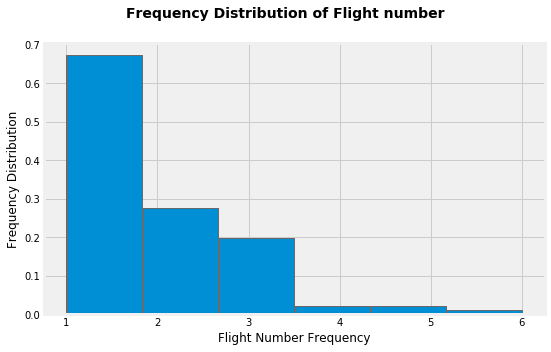

In [13]:
if 'Flight Number' in _737_airCondition_data.columns:
    x=_737_airCondition_data['Flight Number'].value_counts().values
fig, ax=plt.subplots()
fig.set_size_inches(8,5)
ax.hist(x,6,density=1)
fig.suptitle("Frequency Distribution of Flight number", fontsize=14, fontweight='bold')
plt.xlabel("Flight Number Frequency")
plt.ylabel("Frequency Distribution")
plt.show()

we can find the distribution of **FLight Number** is quite scattered, so the data is independent of the **FLight Number,** also given the info from the **737机队空调数据**, i found many data missing for **FLight Number**，   **Time**，so i just delete these two columns, and for other columns the null value rate is relatively low, so i just delete the null values

In [14]:
columns_to_remove=['Flight Number','Time']
if set(columns_to_remove).issubset(list(_737_airCondition_data.columns)):
    _737_airCondition_data.drop(columns_to_remove, axis=1, inplace=True)
_737_airCondition_data.dropna(inplace=True)
_737_airCondition_data.head()

,Ambient temperature(℃),Left temperature difference,Right temperature difference,Left CONTCABINDUCT,Left FWDDUCT,Left AFTDUCT,Left LPACK,Left SUPPLYDUCT,Right CONTCABINDUCT,Right FWDDUCT,Right AFTDUCT,Right LPACK,Right SUPPLYDUCT,Troubleshooting Approaches
0,17.0,5.0,3.0,4.0,0.0,0.0,22.0,0.0,0.0,3.0,3.0,20.0,0.0,更换右组件TCV
1,19.0,7.0,3.0,3.0,0.0,0.0,26.0,0.0,0.0,4.0,3.0,22.0,0.0,更换右侧冲压进气进口作动筒
2,28.0,-3.0,-4.0,2.0,0.0,0.0,25.0,0.0,0.0,8.0,8.0,24.0,0.0,更换左组件PFTC，右PFTC串件
3,24.0,5.0,5.0,4.0,0.0,0.0,29.0,0.0,0.0,4.0,4.0,29.0,0.0,更换前舱配平活门、对串P5-10面板
4,24.0,2.0,1.0,2.0,0.0,0.0,26.0,0.0,0.0,4.0,4.0,25.0,0.0,更换空调面板组件（P5-10)


the first 5 values for **Left FWDDUCT， Left AFTDUCT, Left SUPPLYDUCT, Right CONTCABINDUCT,Right SUPPLYDUC** are all, i did a check on all the data 

In [15]:
variables_to_check=['Left FWDDUCT','Left AFTDUCT','Left SUPPLYDUCT','Right CONTCABINDUCT','Right SUPPLYDUCT']
for i in range(5):
    print(_737_airCondition_data[variables_to_check].iloc[:,i].value_counts(), '\n')

0.0    391
Name: Left FWDDUCT, dtype: int64 

0.0    391
Name: Left AFTDUCT, dtype: int64 

0.0     386
6.0       2
23.0      1
19.0      1
8.0       1
Name: Left SUPPLYDUCT, dtype: int64 

0.0    391
Name: Right CONTCABINDUCT, dtype: int64 

0.0     386
18.0      2
6.0       2
11.0      1
Name: Right SUPPLYDUCT, dtype: int64 



given the data distribution check above, it can be found that the vast majority of the values are 0 so i also will just delete these columns

In [16]:
if set(variables_to_check).issubset(list(_737_airCondition_data.columns)):
    _737_airCondition_data.drop(variables_to_check, axis=1, inplace=True)
_737_airCondition_data.head()

,Ambient temperature(℃),Left temperature difference,Right temperature difference,Left CONTCABINDUCT,Left LPACK,Right FWDDUCT,Right AFTDUCT,Right LPACK,Troubleshooting Approaches
0,17.0,5.0,3.0,4.0,22.0,3.0,3.0,20.0,更换右组件TCV
1,19.0,7.0,3.0,3.0,26.0,4.0,3.0,22.0,更换右侧冲压进气进口作动筒
2,28.0,-3.0,-4.0,2.0,25.0,8.0,8.0,24.0,更换左组件PFTC，右PFTC串件
3,24.0,5.0,5.0,4.0,29.0,4.0,4.0,29.0,更换前舱配平活门、对串P5-10面板
4,24.0,2.0,1.0,2.0,26.0,4.0,4.0,25.0,更换空调面板组件（P5-10)


1.2. **report_1 , report_2, report_3, report_4, report_5** data cleaning

**compare the columns**

in face i found two columns of report_1 not the same with other reports, check and find its due to the space in the column names, so i just manually deleted the spaces in the data. And then i rerun the column names comparing, found they are equal

In [17]:
False not in (report_1.columns == report_2.columns)

True

In [18]:
False not in (report_2.columns==report_3.columns)

True

In [19]:
False not in (report_3.columns==report_4.columns)

True

In [20]:
False not in (report_4.columns==report_5.columns)

True

combine **report_1, report_2, report_3, report_4 and report_5** together

In [21]:
report_data=pd.concat([report_1,report_2,report_3,report_4,report_5],ignore_index=True)

get some infos on column types and number of null values of **report_data**

In [22]:
report_data_Tab_Info=pd.DataFrame(report_data.dtypes).T.rename(index={ 0:'Column Type'})
report_data_Tab_Info=report_data_Tab_Info.append(pd.DataFrame(report_data.isnull().sum()).T.rename(index={ 0: 'nullvalues(nb)' }))
report_data_Tab_Info=report_data_Tab_Info.append(pd.DataFrame(report_data.isnull().sum()).T.rename(index={ 0: 'null values (%)' })/report_data.shape[0]*100)
report_data_Tab_Info

,Aircraft Type,Manufacturing Serial Number,Aircraft Number,Reference Type,Instruction Type,Part Number,Sequence Number,Chapter,Non-planned,Faults Confirmation,Reason for replacement,Installation Date,Flight Hours When Parts Installed,Flight Cycles When Parts Installed,Usage Hours When Parts Installed,Usage Cycles When Parts Installed,Replacement Date,Flight Hours When Parts Uninstalled,Flight Cycles When Parts Uninstalled,Usage Hours When Parts Uninstalled,Usage Cycles When Parts Uinstalled,Faults Description,Parts Usage Hours for This Installation,Faults Handling,Parts Usage Cycles for This Installation,Installed Part Number,Installed Sequence Number,Recent Repair Company,CYTSN,FHTSN,Time from Sending to Repair to Being Removed/FH,Time from Sending to Repair to Being Removed/CY,Part Number Description,DEF#,TLB Number
Column Type,object,object,object,object,object,object,object,int64,object,object,object,object,object,int64,object,int64,object,object,int64,object,int64,object,object,object,int64,object,object,object,int64,float64,object,float64,object,int64,object
nullvalues(nb),0,0,0,0,0,0,0,0,294,385,0,0,0,0,0,0,0,0,0,0,0,727,0,6,0,0,0,1200,0,0,1309,1309,0,0,77
null values (%),0,0,0,0,0,0,0,0,10.1906,13.3449,0,0,0,0,0,0,0,0,0,0,0,25.1993,0,0.207972,0,0,0,41.5945,0,0,45.3726,45.3726,0,0,2.66898


given the high null value rate for the variables: **'Non-planned', 'Faults Confirmation', 'Faults Description','Recent Repair Company', 'Time from Sending to Repair to Being Removed/FH', 'Time from Sending to Repair to Being Removed/CY','TLB Number'**. i am going to remove them from the report data

In [23]:
variables_to_remove=['Non-planned', 'Faults Confirmation', 'Faults Description',\
                     'Recent Repair Company', 'Time from Sending to Repair to Being Removed/FH',\
                     'Time from Sending to Repair to Being Removed/CY','TLB Number']
report_data.drop(variables_to_remove, axis=1, inplace=True)

In [24]:
report_data.head()

,Aircraft Type,Manufacturing Serial Number,Aircraft Number,Reference Type,Instruction Type,Part Number,Sequence Number,Chapter,Reason for replacement,Installation Date,Flight Hours When Parts Installed,Flight Cycles When Parts Installed,Usage Hours When Parts Installed,Usage Cycles When Parts Installed,Replacement Date,Flight Hours When Parts Uninstalled,Flight Cycles When Parts Uninstalled,Usage Hours When Parts Uninstalled,Usage Cycles When Parts Uinstalled,Parts Usage Hours for This Installation,Faults Handling,Parts Usage Cycles for This Installation,Installed Part Number,Installed Sequence Number,CYTSN,FHTSN,Part Number Description,DEF#
0,73C,73C02811,2970,DE,CC,398908-3,2341,21,SCH,2003-01-12,00:00,0,00:00,0,2004-10-01,24857:56,15916,24857:56,15916,24857:56,航后完成MAOTG210017按AMM21-61-21程序拆装更换左组件TCV并完成测试工作...,15916,398908-3,2313,23611,41635.27,(AOG)VALVE(重点监控件号),142145
1,73C,73C02922,2987,DE,CC,398908-3,2621,21,FAIL,2003-06-11,00:00,0,00:00,0,2005-10-09,25487:59,14636,25487:59,14636,25487:59,更换温度控制活门CTV，测试正常。田庆军挂签号1002185,14636,398908-3,3623,25200,41283.14,(AOG)VALVE(重点监控件号),235793
2,73C,73C02793,2967,DE,CC,398908-3,285C,21,SWAP,2005-01-14,26498:45,16905,00:00,0,2006-07-24,31348:53,19979,4850:08,3074,4850:08,"航后自检2#ZTC上有TCV信息,将本机前舱配平空气调节活门与右PACKTCV对串故障依旧,...",3074,398908-3,229C,29015,47377.21,(AOG)VALVE(重点监控件号),317331
3,73C,73C02793,2967,DE,CC,398908-3,285C,21,FAIL,2006-07-25,31358:32,19983,4859:47,3078,2006-07-25,31358:32,19983,4859:47,3078,00:00,航后自检2＃ ITC上有TRIMAIRVLV信息，将前舱后舱配平活门对串，故障转移，更换该配...,0,398908-3,2358,31964,61705.26,(AOG)VALVE(重点监控件号),317739
4,73C,73C02793,2967,DE,CC,398908-3,285C,21,FAIL,2006-07-24,31348:53,19979,4850:08,3074,2006-07-25,31358:32,19983,4859:47,3078,09:39,航后自检2＃ ITC上有TRIMAIRVLV信息，将前舱后舱配平活门对串，故障转移，更换该配...,4,398908-3,8108,19107,39277.59,(AOG)VALVE(重点监控件号),317739


**2. Desription of the Data**

2.1. 737机队空调数据

2.1.1 Basic statistical description

In [25]:
_737_airCondition_data.head()

,Ambient temperature(℃),Left temperature difference,Right temperature difference,Left CONTCABINDUCT,Left LPACK,Right FWDDUCT,Right AFTDUCT,Right LPACK,Troubleshooting Approaches
0,17.0,5.0,3.0,4.0,22.0,3.0,3.0,20.0,更换右组件TCV
1,19.0,7.0,3.0,3.0,26.0,4.0,3.0,22.0,更换右侧冲压进气进口作动筒
2,28.0,-3.0,-4.0,2.0,25.0,8.0,8.0,24.0,更换左组件PFTC，右PFTC串件
3,24.0,5.0,5.0,4.0,29.0,4.0,4.0,29.0,更换前舱配平活门、对串P5-10面板
4,24.0,2.0,1.0,2.0,26.0,4.0,4.0,25.0,更换空调面板组件（P5-10)


In [26]:
_737_airCondition_data.describe()

,Ambient temperature(℃),Left temperature difference,Right temperature difference,Left CONTCABINDUCT,Left LPACK,Right FWDDUCT,Right AFTDUCT,Right LPACK
count,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000
mean,20.810742,6.966752,6.135550,4.544757,27.777494,4.785166,4.672634,26.946292
std,5.776166,6.338844,5.671751,1.770822,6.757264,1.910802,1.893374,6.448588
min,2.000000,-30.000000,-30.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,4.000000,3.000000,4.000000,24.000000,4.000000,4.000000,23.000000
50%,22.000000,8.000000,7.000000,4.000000,28.000000,4.000000,4.000000,28.000000
75%,25.000000,10.000000,9.000000,6.000000,32.000000,6.000000,6.000000,32.000000
max,32.000000,24.000000,21.000000,12.000000,40.000000,16.000000,14.000000,38.000000


take a look at the histgram of the temperature:

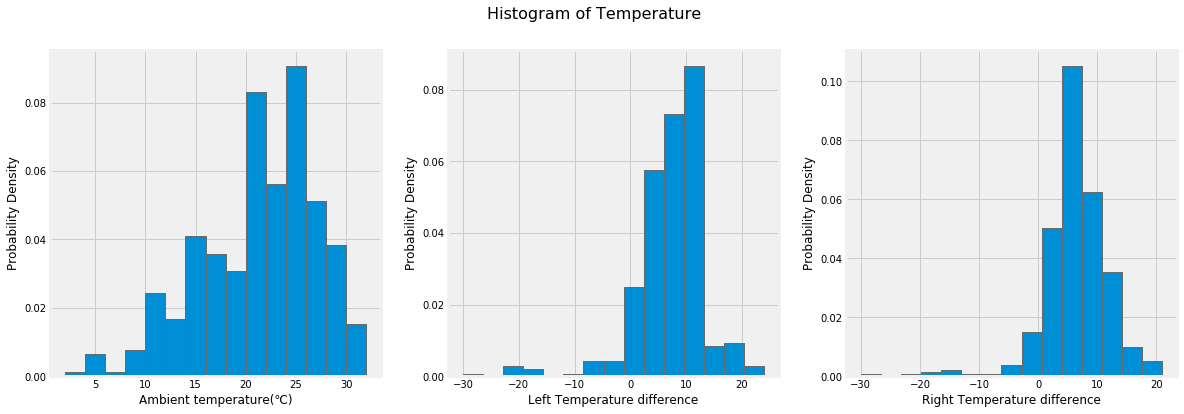

In [27]:
fig=plt.figure(figsize=(18,6))
fig.suptitle('Histogram of Temperature', fontsize=16)

plt.subplot(1,3,1)
plt.hist(_737_airCondition_data['Ambient temperature(℃)'], 15, density=1)
plt.xlabel('Ambient temperature(℃)')
plt.ylabel('Probability Density')


plt.subplot(1,3,2)
plt.hist(_737_airCondition_data['Left temperature difference'], 15, density=1)
plt.xlabel('Left Temperature difference')
plt.ylabel('Probability Density')

plt.subplot(1,3,3)
plt.hist(_737_airCondition_data['Right temperature difference'], 15, density=1)
plt.xlabel('Right Temperature difference')
plt.ylabel('Probability Density')

plt.show()

also i added the boxplot(see https://en.wikipedia.org/wiki/Box_plot for details of boxplt) to identify outliers

<function matplotlib.pyplot.show(*args, **kw)>

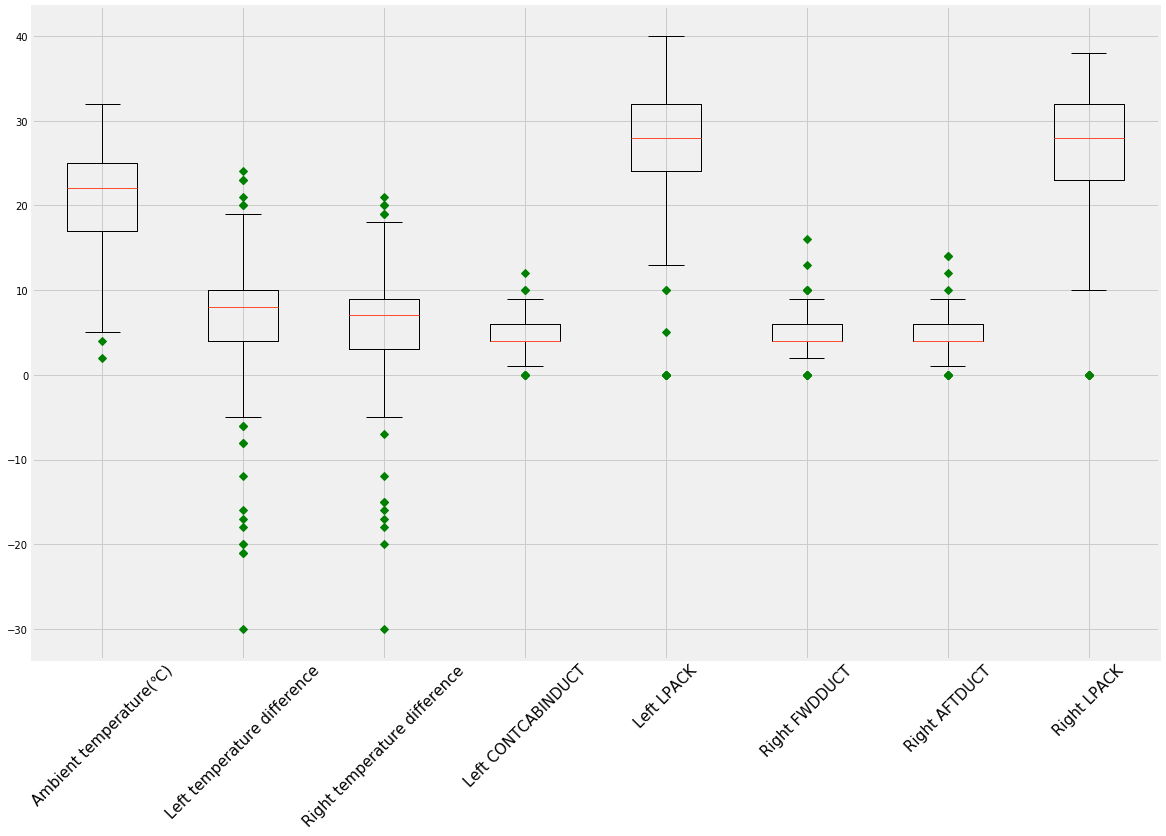

In [28]:
data=_737_airCondition_data.iloc[:,:-1].values
labels=_737_airCondition_data.iloc[:,:-1].columns
plt.figure(figsize=(18,12))
plt.boxplot(data, sym='gD')
ax=plt.gca()
ax.set_xticklabels(labels, rotation=45, fontsize=15)
plt.show

**2.2 Air conditioner parts failure history data**

2.2.1 Basic statistical description

In [29]:
report_data.describe()

,Chapter,Flight Cycles When Parts Installed,Usage Cycles When Parts Installed,Flight Cycles When Parts Uninstalled,Usage Cycles When Parts Uinstalled,Parts Usage Cycles for This Installation,CYTSN,FHTSN,DEF#
count,2885.0,2885.000000,2885.000000,2885.000000,2885.000000,2885.000000,2885.000000,2885.000000,2.885000e+03
mean,21.0,7951.685269,8097.650953,12217.768804,12345.836395,4248.185442,18038.819757,33321.788880,3.140744e+06
std,0.0,8279.494986,9390.820167,8211.167766,9266.113773,5087.163714,10985.122148,19297.554986,2.097280e+06
min,21.0,0.000000,0.000000,12.000000,0.000000,-21866.000000,0.000000,0.000000,2.388900e+04
25%,21.0,0.000000,0.000000,5542.000000,4955.000000,596.000000,9027.000000,17183.170000,1.251734e+06
50%,21.0,5768.000000,4737.000000,10353.000000,10291.000000,2603.000000,16159.000000,30769.270000,2.724198e+06
75%,21.0,12822.000000,13176.000000,17259.000000,17645.000000,6057.000000,25994.000000,48525.340000,4.987657e+06
max,21.0,38076.000000,45320.000000,38383.000000,48520.000000,32961.000000,48920.000000,102340.530000,7.157262e+06


it was found that only chapter 21 was involved:

In [30]:
report_data['Chapter'].value_counts()

21    2885
Name: Chapter, dtype: int64

**3. predicting the maintenance method** 

this prefiction is based on the **_737_airCondition_data**

Note: the data set we have is small, with only 400 rows of data and lots of of the data inside missing.We also miss the metadata or the data dictionary, so it's very hard for me to find the potential correlation between different variables, which is very important for analysis.

**3.1.** Clustering

before doing prediction analysis i did a Kmeans(https://en.wikipedia.org/wiki/K-means_clustering) analysis to find what variables are the most correlated

In [31]:
# import the KMeans module
from sklearn.cluster import KMeans
# import the preprocessing module for data scaling
from sklearn.preprocessing import StandardScaler

**3.1.1.** defining **k**

the label of the **737airCondition_data** can be inferred from the **Troubleshooting Approaches** variable.
Firstly i did a value check to this variable.

In [32]:
_737_airCondition_data['Troubleshooting Approaches'].value_counts()

正常                       209
反吹左组件，未完成                 42
反吹左组件                     37
反吹右组件                     26
反吹右组件，未完成                 15
反吹左、右组件                   13
反吹左、右组件，未完成                6
更换右组件TCV                   4
更换左组件TCV                   3
更换驾驶舱配平活门                  3
更换温控面板                     2
更换ACM                      2
更换左组件温度传感器T488             1
更换空调温度控制面板                 1
更换作动器                      1
更换P5-17控制面板                1
反吹右组件、冷凝器波纹管漏水             1
更换右侧冲压进气进口作动筒              1
更换右侧冲压进气出口作动器              1
更换右组件传感器T474和T489          1
更换左组件冲压进气作动器               1
对串T488/T489                1
更换ZTC1                     1
更换TEMPBULB                 1
更换右侧空调组件流量控制关断活门           1
完成右组件散热器反向吹除               1
更换右组件冲压进气门作动筒              1
更换前舱配平活门                   1
更换右侧冲压进气进口作动筒、更换PFTC2      1
更换P5-17面板                  1
对串ZTC1、吹除左组件散热器            1
串件温度传感器                    1
更换右侧再循环风扇                  1
更换左组件温度传感器                 1
更换驾驶舱配平空气活门   

given this label value counts, i initially made a guess that maybe there were 4 categories of troubleshooting approaches:

* class 0: 正常
* class 1: 反吹XX
* class 2: 更换
* class 3：对串XX

So what i did is to set **k=4**

**3.1.2.** set X and y and scale data

In [33]:
select_df=_737_airCondition_data.iloc[:,:-1]
select_df.head()

,Ambient temperature(℃),Left temperature difference,Right temperature difference,Left CONTCABINDUCT,Left LPACK,Right FWDDUCT,Right AFTDUCT,Right LPACK
0,17.0,5.0,3.0,4.0,22.0,3.0,3.0,20.0
1,19.0,7.0,3.0,3.0,26.0,4.0,3.0,22.0
2,28.0,-3.0,-4.0,2.0,25.0,8.0,8.0,24.0
3,24.0,5.0,5.0,4.0,29.0,4.0,4.0,29.0
4,24.0,2.0,1.0,2.0,26.0,4.0,4.0,25.0


In [34]:
X = StandardScaler().fit_transform(select_df)

**3.1.3.** Use the K-Means Clustering

In [35]:
model=KMeans(n_clusters=4).fit(X)

In [36]:
y=model.predict(X)

In [37]:
centers=model.cluster_centers_

In [38]:
centers

array([[ 0.62758495, -0.0458249 , -0.10427052, -0.19629129,  0.49347747,
        -0.32671541, -0.37787885,  0.47043448],
       [ 0.340292  ,  0.17825522,  0.381688  ,  0.84303624,  0.45810181,
         1.33526759,  1.33781707,  0.64051576],
       [-1.01810908,  0.28538332,  0.11812841, -0.17108276, -0.60257615,
        -0.31727752, -0.26481873, -0.80804847],
       [-0.25610437, -3.65414544, -2.48075433, -1.34465047, -3.64679523,
        -1.41579016, -1.28117234, -2.41130645]])

In [39]:
# Function that creates a DataFrame with a column for Cluster Number

def pd_centers(featuresUsed, centers):
	colNames = list(featuresUsed)
	colNames.append('prediction')

	# Zip with a column called 'prediction' (index)
	Z = [np.append(A, index) for index, A in enumerate(centers)]
	#print(Z)

	# Convert to pandas data frame for plotting
	P = pd.DataFrame(Z, columns=colNames)
	P['prediction'] = P['prediction'].astype(int)
	return P

In [40]:
# Function that creates Parallel Plots
from itertools import cycle, islice
from pandas.plotting import parallel_coordinates
def parrelel_plot(data):
    my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(data)))
    plt.figure(figsize=(15,8)).gca().axes.set_ylim([-4,+3])
    values=data.iloc[:,:-1].values
    x=data.columns[:-1]
    for i in range(len(values)):
        plt.plot(x, values[i], label= data['prediction'][i], color = my_colors[i], marker='o',)
    plt.legend()
    plt.xticks(rotation=45, fontsize=15)

In [41]:
features=_737_airCondition_data.columns[:-1]

In [42]:
P = pd_centers(features, centers)
P

,Ambient temperature(℃),Left temperature difference,Right temperature difference,Left CONTCABINDUCT,Left LPACK,Right FWDDUCT,Right AFTDUCT,Right LPACK,prediction
0,0.627585,-0.045825,-0.104271,-0.196291,0.493477,-0.326715,-0.377879,0.470434,0
1,0.340292,0.178255,0.381688,0.843036,0.458102,1.335268,1.337817,0.640516,1
2,-1.018109,0.285383,0.118128,-0.171083,-0.602576,-0.317278,-0.264819,-0.808048,2
3,-0.256104,-3.654145,-2.480754,-1.344650,-3.646795,-1.415790,-1.281172,-2.411306,3


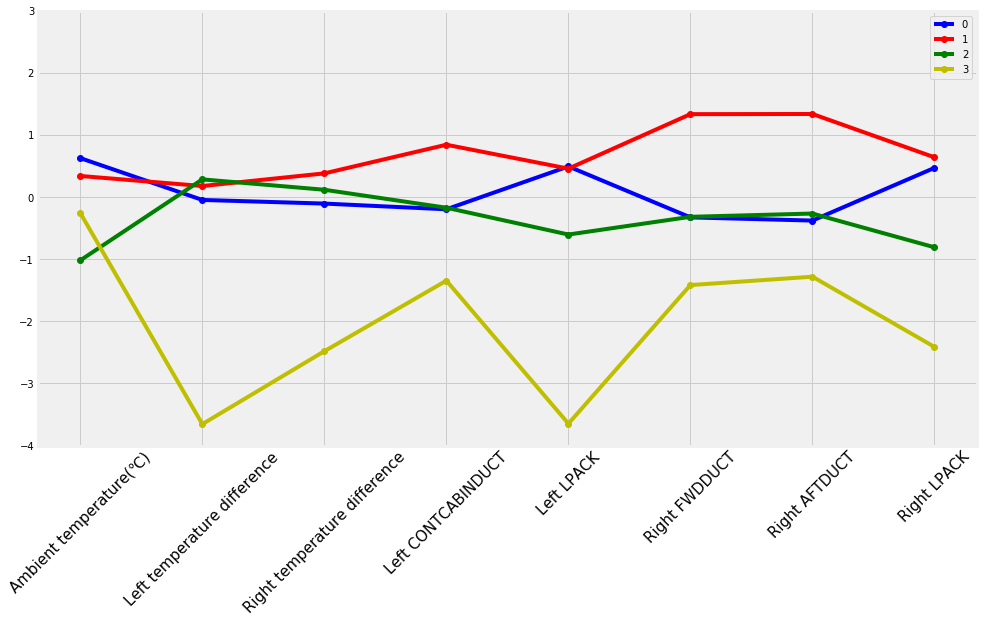

In [43]:
parrelel_plot(P)

**3.2.**  Predicting with ML classifieries

In this section the first to show is the process of building three ML models: SVM, Naive Bayes and Decision Tree. Then  a conparison between these threee model's accuracies will be demonstrated.

Before implementing any machine learning model for prediciton, i determined the input matrix as X and the output label series as y

In [44]:
# import the accuracy calculation module
from sklearn.metrics import accuracy_score
# Determine X and y

X = select_df.values
Methods = _737_airCondition_data.iloc[:,-1]
# define a function to normalize the lalel column

def string_to_num (values):
    new_values=list()
    for value in values:
        if "正常" in value:
            new_values.append(0)
        elif "反吹" in value:
            new_values.append(1)
        elif "更换" in value or "完成" in value:
            new_values.append(2)
        elif "对串" in value or "串件" in value:
            new_values.append(3)
        else:
            print (value)
            raise ValueError
    return new_values

#Call the function to normalize the Methods values
y=np.array(string_to_num(Methods.values))
# Split the data into train data and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=324)

**3.2.1.** **SVM** classifier

A Support Vector Machine (SVM) is a discriminative classifier formally defined by a separating hyperplane. In other words, given labeled training data (supervised learning), the algorithm outputs an optimal hyperplane which categorizes new examples. In two dimentional space this hyperplane is a line dividing a plane in two parts where in each class lay in either side


The advantages of support vector machines are:

* Effective in high dimensional spaces.
* Still effective in cases where number of dimensions is greater than the number of samples.
* Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.
* Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.

The disadvantages of support vector machines include:

* If the number of features is much greater than the number of samples, avoid over-fitting in choosing Kernel functions and regularization term is crucial.
* SVMs do not directly provide probability estimates, these are calculated using an expensive five-fold cross-validation (see Scores and probabilities, below).

**3.2.1.1**  Classifier build and predict

In [45]:
# import the related module
from sklearn import svm
svm_clf=svm.SVC(gamma='scale')

In [46]:
svm_clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [47]:
svm_y_pred=svm_clf.predict(X_test)

**3.2.1.2** Evalute accuracy

In [48]:
svm_accuracy = accuracy_score(y_test, svm_y_pred)
print(svm_accuracy)

0.7848101265822784


**3.2.2** **Naive Bayes** classifier

Naive Bayes classifier calculates the probabilities for every factor.Then it selects the outcome with highest probability.This classifier assumes the features (in this case we had words as input) are independent.Even with this it is powerful algorithm used for:

* **Real time Prediction**
* **Text classification/ Spam Filtering**
* **Recommendation System**

**3.2.2.1**  Classifier build and predict

In [49]:
# import the related moculde
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split


In [50]:
# MOdel Building
NB_clf=GaussianNB()
NB_clf.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [51]:
NB_y_pred=NB_clf.predict(X_test)

**3.2.2.2** Evalute accuracy

In [52]:
NB_accuracy = accuracy_score(y_test, NB_y_pred)
print(NB_accuracy)

0.6962025316455697


**3.2.3.** **Decision Tree** classifier

Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

Some advantages of decision trees are:

* Simple to understand and to interpret. Trees can be visualised.
* Requires little data preparation. Other techniques often require data normalisation, dummy variables need to be created and blank values to be removed. Note however that this module does not support missing values.
* The cost of using the tree (i.e., predicting data) is logarithmic in the number of data points used to train the tree.
* Able to handle both numerical and categorical data. Other techniques are usually specialised in analysing datasets that have only one type of variable. See algorithms for more information.
* Able to handle multi-output problems.
* Uses a white box model. If a given situation is observable in a model, the explanation for the condition is easily explained by boolean logic. By contrast, in a black box model (e.g., in an artificial neural network), results may be more difficult to interpret.
* Possible to validate a model using statistical tests. That makes it possible to account for the reliability of the model.
* Performs well even if its assumptions are somewhat violated by the true model from which the data were generated.

The disadvantages of decision trees include:

* Decision-tree learners can create over-complex trees that do not generalise the data well. This is called overfitting. Mechanisms such as pruning (not currently supported), setting the minimum number of samples required at a leaf node or setting the maximum depth of the tree are necessary to avoid this problem.
* Decision trees can be unstable because small variations in the data might result in a completely different tree being generated. This problem is mitigated by using decision trees within an ensemble.
* The problem of learning an optimal decision tree is known to be NP-complete under several aspects of optimality and even for simple concepts. Consequently, practical decision-tree learning algorithms are based on heuristic algorithms such as the greedy algorithm where locally optimal decisions are made at each node. Such algorithms cannot guarantee to return the globally optimal decision tree. This can be mitigated by training multiple trees in an ensemble learner, where the features and samples are randomly sampled with replacement.
* There are concepts that are hard to learn because decision trees do not express them easily, such as XOR, parity or multiplexer problems.
* Decision tree learners create biased trees if some classes dominate. It is therefore recommended to balance the dataset prior to fitting with the decision tree.

**3.2.3.1**  Classifier build and predict

In [53]:
# import the related module
from sklearn import tree


DT_clf=tree.DecisionTreeClassifier()
DT_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [54]:
DT_y_pred=DT_clf.predict(X_test)

**3.2.3.2**  PLot the tree in textual format

In [3]:
# I was not able to import the related modules in this environment

**3.2.2.3** Evalute accuracy

In [58]:
DT_accuracy = accuracy_score(y_test, DT_y_pred)
print(DT_accuracy)

0.7974683544303798


**3.3** Accuracy Comparison between these three ML Models

In [59]:
# build a tabular data for accuracy

pd.DataFrame([[svm_accuracy, NB_accuracy,DT_accuracy ]], columns=['svm_accuracy','NB_accuracy','DT_accuracy'], index=['accuracy'])

,svm_accuracy,NB_accuracy,DT_accuracy
accuracy,0.78481,0.696203,0.797468


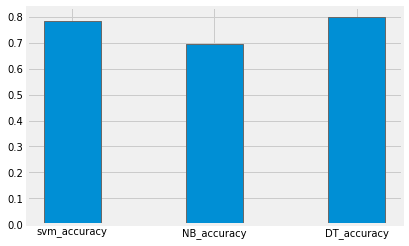

In [60]:
plt.bar(['svm_accuracy','NB_accuracy','DT_accuracy'],[svm_accuracy, NB_accuracy,DT_accuracy ], width=0.4)
plt.show()